Mounted at /content/drive
Setting up environment...
Created output directory: hyperface_patterns

=== Advanced Hyperface Pattern Generator ===

Contents of /content/drive/MyDrive/lfw-deepfunneled: ['lfw-deepfunneled.zip', 'lfw']
Checking for ZIP at: /content/drive/MyDrive/lfw-deepfunneled/lfw-deepfunneled.zip
Extracting /content/drive/MyDrive/lfw-deepfunneled/lfw-deepfunneled.zip to /content/lfw-deepfunneled...
Extraction complete.
Checking LFW directory: /content/lfw-deepfunneled/lfw
LFW directory not found at /content/lfw-deepfunneled/lfw. Trying alternative structure...
Contents of /content/lfw-deepfunneled: ['Luo_Linquan', 'Brett_Boone', 'Vytas_Danelius', 'Walter_Annenberg', 'Anton_Balasingham', 'Elena_Bovina', 'Sergey_Lavrov', 'David_Scott_Morris', 'Se_Hyuk_Joo', 'Guenter_Verheugen', 'Vince_Gill', 'Eliott_Spitzer', 'Pat_Burns', 'Tom_Tunney', 'Michael_Chertoff', 'MC_Hammer', 'Heather_Whitestone_McCallum', 'Lucio_Cecchinello', 'Lloyd_Novick', 'Lucio_Gutierrez', 'Lucia_Kenny_Anthony'

100%|█████████▉| 999/1000 [00:00<00:00, 1737.71it/s]


Successfully processed 1000 faces

Successfully prepared 1000 faces for pattern generation
Generating psychedelic hyperface pattern with 200 faces...


Superimposing faces: 100%|██████████| 200/200 [00:31<00:00,  6.43it/s]


Pattern saved at hyperface_patterns/psychedelic_hyperface.jpg


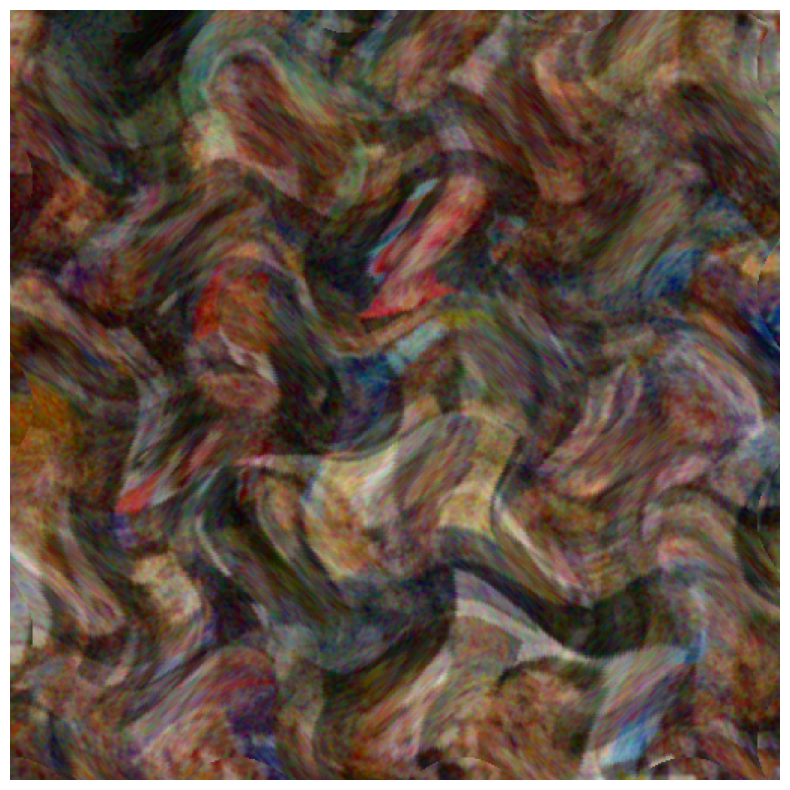

Patterns copied to Google Drive


In [ ]:
# Instalar dependencias
!pip install opencv-python numpy matplotlib pillow requests tqdm

import os
import glob
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from typing import List, Tuple
import random

# Función para configurar el entorno
def setup_environment(output_dir: str = "hyperface_patterns") -> tuple:
    print("Setting up environment...")
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Created output directory: {output_dir}")
    return output_dir, "/content"

# Función para cargar el dataset
def download_face_dataset(dataset_dir: str, sample_limit: int = 1000) -> List[str]:
    zip_path = os.path.join(dataset_dir, "lfw-deepfunneled.zip")
    extracted_dir = os.path.join("/content", "lfw-deepfunneled")

    print(f"Checking for ZIP at: {zip_path}")
    if not os.path.exists(zip_path):
        raise ValueError(f"ZIP file not found at {zip_path}. Please ensure lfw-deepfunneled.zip is in {dataset_dir}.")

    if not os.path.exists(extracted_dir):
        print(f"Extracting {zip_path} to {extracted_dir}...")
        try:
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall("/content")
            print("Extraction complete.")
        except zipfile.BadZipFile:
            raise ValueError(f"Error: {zip_path} is corrupted or not a valid ZIP file.")

    lfw_dir = os.path.join(extracted_dir, "lfw")
    print(f"Checking LFW directory: {lfw_dir}")
    if not os.path.exists(lfw_dir):
        print(f"LFW directory not found at {lfw_dir}. Trying alternative structure...")
        print(f"Contents of {extracted_dir}: {os.listdir(extracted_dir)}")
        lfw_dir = extracted_dir
        face_images = glob.glob(os.path.join(lfw_dir, "**", "*.jpg"), recursive=True)
        if not face_images:
            lfw_dir = os.path.join(extracted_dir, "lfw-deepfunneled", "lfw")
            print(f"Checking nested LFW directory: {lfw_dir}")
            if os.path.exists(lfw_dir):
                face_images = glob.glob(os.path.join(lfw_dir, "**", "*.jpg"), recursive=True)
            if not face_images:
                print(f"Contents of {extracted_dir}: {os.listdir(extracted_dir)}")
                raise ValueError(f"No face images found in {lfw_dir} or nested structure.")
    else:
        face_images = glob.glob(os.path.join(lfw_dir, "**", "*.jpg"), recursive=True)

    print(f"Found {len(face_images)} images in {lfw_dir}")
    if not face_images:
        raise ValueError(f"No face images found in {lfw_dir}. Please check the dataset structure.")

    if len(face_images) > sample_limit:
        face_images = face_images[:sample_limit]
        print(f"Using {len(face_images)} face images from LFW dataset.")
    else:
        print(f"Found {len(face_images)} face images in LFW dataset.")

    if face_images:
        print("Sample image paths:", face_images[:5])

    return face_images

# Función para preprocesar imágenes
def detect_and_align_faces(image_paths: List[str],
                          target_size: Tuple[int, int] = (128, 128),
                          max_faces: int = 1000) -> List[np.ndarray]:
    print(f"Processing faces (max: {max_faces})...")
    aligned_faces = []

    for img_path in tqdm(image_paths[:max_faces]):
        try:
            img = cv2.imread(img_path)
            if img is None:
                print(f"Failed to load image: {img_path}")
                continue

            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            face_img = cv2.resize(img_rgb, target_size)
            aligned_faces.append(face_img)

            if len(aligned_faces) >= max_faces:
                break

        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            continue

    print(f"Successfully processed {len(aligned_faces)} faces")
    return aligned_faces

# Función para generar patrón adversario psicodélico
def generate_psychedelic_hyperface_pattern(faces: List[np.ndarray], output_size: Tuple[int, int] = (512, 512),
                                          num_faces: int = 200, output_path: str = "hyperface_patterns/psychedelic_pattern.jpg") -> None:
    """
    Genera un patrón adversario psicodélico superponiendo y distorsionando rostros.

    Args:
        faces: Lista de imágenes de rostros como arreglos NumPy.
        output_size: Tamaño de la imagen de salida.
        num_faces: Número de rostros a superponer.
        output_path: Ruta donde guardar el patrón.
    """
    print(f"Generating psychedelic hyperface pattern with {num_faces} faces...")

    # Crear lienzo en blanco
    canvas = np.zeros((output_size[1], output_size[0], 3), dtype=np.float32)

    # Seleccionar rostros aleatorios
    selected_faces = random.sample(faces, min(num_faces, len(faces)))

    for face in tqdm(selected_faces, desc="Superimposing faces"):
        # Redimensionar rostro con escala aleatoria
        scale = random.uniform(0.5, 1.5)
        new_size = (int(face.shape[1] * scale), int(face.shape[0] * scale))
        if new_size[0] > 0 and new_size[1] > 0:
            face_resized = cv2.resize(face, new_size)

            # Rotar rostro
            angle = random.uniform(-30, 30)
            M = cv2.getRotationMatrix2D((new_size[0] / 2, new_size[1] / 2), angle, 1)
            face_rotated = cv2.warpAffine(face_resized, M, new_size)

            # Posición aleatoria en el lienzo
            x_offset = random.randint(-new_size[0] // 2, output_size[0] - new_size[0] // 2)
            y_offset = random.randint(-new_size[1] // 2, output_size[1] - new_size[1] // 2)

            # Transparencia aleatoria
            alpha = random.uniform(0.1, 0.5)

            # Superponer rostro
            for c in range(3):  # Por canal (RGB)
                for i in range(new_size[1]):
                    for j in range(new_size[0]):
                        canvas_y = y_offset + i
                        canvas_x = x_offset + j
                        if 0 <= canvas_y < output_size[1] and 0 <= canvas_x < output_size[0]:
                            canvas[canvas_y, canvas_x, c] = (
                                canvas[canvas_y, canvas_x, c] * (1 - alpha) +
                                face_rotated[i, j, c] * alpha
                            )

    # Aplicar distorsiones psicodélicas
    canvas = canvas.astype(np.uint8)

    # 1. Añadir ruido
    noise = np.random.normal(0, 25, canvas.shape).astype(np.int16)
    canvas = np.clip(canvas.astype(np.int16) + noise, 0, 255).astype(np.uint8)

    # 2. Desenfoque suave
    canvas = cv2.GaussianBlur(canvas, (5, 5), 0)

    # 3. Distorsión sinusoidal
    rows, cols = canvas.shape[:2]
    distorted = np.zeros_like(canvas)
    for i in range(rows):
        for j in range(cols):
            offset_x = int(16.0 * np.sin(2 * 3.14 * i / 150))
            offset_y = int(16.0 * np.cos(2 * 3.14 * j / 150))
            if 0 <= i + offset_y < rows and 0 <= j + offset_x < cols:
                distorted[i, j] = canvas[(i + offset_y) % rows, (j + offset_x) % cols]
            else:
                distorted[i, j] = canvas[i, j]
    canvas = distorted

    # 4. Ajuste de color (aumentar saturación)
    hsv = cv2.cvtColor(canvas, cv2.COLOR_RGB2HSV)
    hsv[:, :, 1] = np.clip(hsv[:, :, 1] * 1.5, 0, 255).astype(np.uint8)
    canvas = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

    # Guardar el patrón
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    plt.imsave(output_path, canvas)
    print(f"Pattern saved at {output_path}")

    # Mostrar el patrón (opcional, para Colab)
    plt.figure(figsize=(10, 10))
    plt.imshow(canvas)
    plt.axis('off')
    plt.show()

# Función main
def main():
    from google.colab import drive
    drive.mount('/content/drive')

    output_dir, _ = setup_environment()
    dataset_dir = "/content/drive/MyDrive/lfw-deepfunneled"

    print("\n=== Advanced Hyperface Pattern Generator ===\n")
    print(f"Contents of {dataset_dir}: {os.listdir(dataset_dir)}")

    face_image_paths = download_face_dataset(dataset_dir, sample_limit=1000)
    if not face_image_paths:
        print("Error: Could not obtain face images. Exiting.")
        return

    aligned_faces = detect_and_align_faces(face_image_paths, max_faces=1000)
    if not aligned_faces:
        print("Error: No faces could be detected and aligned. Exiting.")
        return

    print(f"\nSuccessfully prepared {len(aligned_faces)} faces for pattern generation")

    # Generar patrón psicodélico
    generate_psychedelic_hyperface_pattern(
        faces=aligned_faces,
        output_size=(512, 512),
        num_faces=200,
        output_path=os.path.join(output_dir, "psychedelic_hyperface.jpg")
    )

    # Copiar resultados a Drive
    !cp -r /content/hyperface_patterns /content/drive/MyDrive/lfw-deepfunneled/hyperface_patterns
    print("Patterns copied to Google Drive")

if __name__ == "__main__":
    main()